## How classical problem could look

1. Loading data
    - various formats `txt`, `csv`, `xls` and many others
    - errors in format (specially if humans created it)
2. Preprocess data - this is very important
    - missing values (fill them or throw athem away?)
    - errors (cleaning the data)
    - reduction (we can encode 100 temperature sensor to less numbers)
    - standardization, normalization (for example if it makes sense for us to shift mean value to 0.0)
3. Process data
    - this usually envolves model assemble and calculation
4. Visualise our processing resluts

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Loading data

- we will use `csv` covid data from last year
- of course data are very nice and clean

In [7]:
#there are many options in read_csv, study the documentation
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data = pd.read_csv(url) # coronavirus data

In [8]:
data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,171857,171931,172205,172441,172716,172901,173047,173084,173146,173395
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,269601,269904,270164,270370,270455,270734,270947,271141,271141,271527
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,263685,263936,264054,264201,264365,264488,264603,264706,264778,264855
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,37589,37589,37589,37589,37820,37901,37958,37999,37999,37999
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,98605,98617,98638,98658,98671,98698,98701,98701,98701,98701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,627956,627956,627956,633684,636055,638172,640214,640214,640214,640214
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,508,508,509,509,509,510,510,514,514,518
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11731,11731,11736,11741,11746,11751,11751,11759,11760,11769
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,310764,311016,311194,311264,311592,311888,312118,312374,312611,312707


## Data preprocessing

- we do not like this format, we will use `melt` to obtain nice column vectors
- we will drop useless column

In [13]:
# We will select only Czech Republic
df = data[data["Country/Region"]=="Czechia"]
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22
102,NaN,Czechia,49.8175,15.473,0,0,0,0,0,0,...,3483932,3497820,3506076,3523869,3523869,3538222,3549479,3559560,3568717,3574328


In [14]:
#deleting Province/State column, because it is not useful in this case
df = df.drop(columns="Province/State")
df

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22
102,Czechia,49.8175,15.473,0,0,0,0,0,0,0,...,3483932,3497820,3506076,3523869,3523869,3538222,3549479,3559560,3568717,3574328


In [29]:
# convert each date column into a separate row item, using the melt() method
melt = df.melt(id_vars=['Country/Region', 'Lat', 'Long'], var_name="Date" ,value_name='TotalCases')       
melt.head() # prints only n-first rows (default is 5)

,Country/Region,Lat,Long,Date,TotalCases
0,Czechia,49.8175,15.473,1/22/20,0
1,Czechia,49.8175,15.473,1/23/20,0
2,Czechia,49.8175,15.473,1/24/20,0
3,Czechia,49.8175,15.473,1/25/20,0
4,Czechia,49.8175,15.473,1/26/20,0


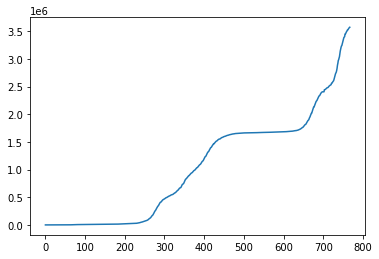

In [30]:
# Quickly check what we have
plt.plot(melt["TotalCases"].values)

### Data processing

- we would like to have derivation (difference)
- are there differences in weekdays?
- remember functions `melt` (`pivot`), `apply`, `groupby` - extremely usefull


In [31]:
melt["TotalCasesDiff"] = melt["TotalCases"].diff()
melt

,Country/Region,Lat,Long,Date,TotalCases,TotalCasesDiff
0,Czechia,49.8175,15.473,1/22/20,0,NaN
1,Czechia,49.8175,15.473,1/23/20,0,0.0
2,Czechia,49.8175,15.473,1/24/20,0,0.0
3,Czechia,49.8175,15.473,1/25/20,0,0.0
4,Czechia,49.8175,15.473,1/26/20,0,0.0
...,...,...,...,...,...,...
763,Czechia,49.8175,15.473,2/23/22,3538222,14353.0
764,Czechia,49.8175,15.473,2/24/22,3549479,11257.0
765,Czechia,49.8175,15.473,2/25/22,3559560,10081.0
766,Czechia,49.8175,15.473,2/26/22,3568717,9157.0


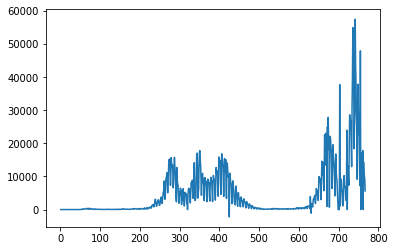

In [32]:
# Quickly check our new column
plt.plot(melt["TotalCasesDiff"].values)

In [33]:
# maybe it would be nice, to smoothen it a little bit
# we will use MA (moving average) filter

In [34]:
WINDOW_SIZE = 5
melt["TotalCasesDiffFiltered"] = melt["TotalCasesDiff"].rolling(WINDOW_SIZE).mean()
melt

,Country/Region,Lat,Long,Date,TotalCases,TotalCasesDiff,TotalCasesDiffFiltered
0,Czechia,49.8175,15.473,1/22/20,0,NaN,NaN
1,Czechia,49.8175,15.473,1/23/20,0,0.0,NaN
2,Czechia,49.8175,15.473,1/24/20,0,0.0,NaN
3,Czechia,49.8175,15.473,1/25/20,0,0.0,NaN
4,Czechia,49.8175,15.473,1/26/20,0,0.0,NaN
...,...,...,...,...,...,...,...
763,Czechia,49.8175,15.473,2/23/22,3538222,14353.0,10858.0
764,Czechia,49.8175,15.473,2/24/22,3549479,11257.0,10331.8
765,Czechia,49.8175,15.473,2/25/22,3559560,10081.0,10696.8
766,Czechia,49.8175,15.473,2/26/22,3568717,9157.0,8969.6


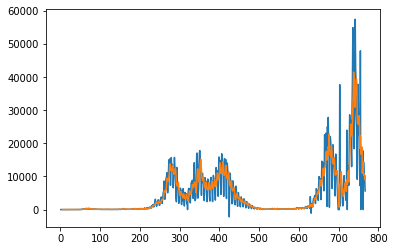

In [35]:
# Quickly check our new column
plt.plot(melt["TotalCasesDiff"].values)
plt.plot(melt["TotalCasesDiffFiltered"].values)

In [73]:
# create function str as date -> day of week
import datetime
def date_to_dow(date: str) -> int:
    """ Converts string in format 'MM/DD/YY' into day of week """
    # convert str -> datetime.date
    d = datetime.datetime.strptime(date, "%m/%d/%y")
    # use function to get weekday
    # 1 - Monday, ...
    return d.weekday()

In [74]:
# apply this function to
melt["DayOfWeek"] = melt["Date"].apply(date_to_dow)
melt

,Country/Region,Lat,Long,Date,TotalCases,TotalCasesDiff,TotalCasesDiffFiltered,DayOfWeek
0,Czechia,49.8175,15.473,1/22/20,0,NaN,NaN,2
1,Czechia,49.8175,15.473,1/23/20,0,0.0,NaN,3
2,Czechia,49.8175,15.473,1/24/20,0,0.0,NaN,4
3,Czechia,49.8175,15.473,1/25/20,0,0.0,NaN,5
4,Czechia,49.8175,15.473,1/26/20,0,0.0,NaN,6
...,...,...,...,...,...,...,...,...
763,Czechia,49.8175,15.473,2/23/22,3538222,14353.0,10858.0,2
764,Czechia,49.8175,15.473,2/24/22,3549479,11257.0,10331.8,3
765,Czechia,49.8175,15.473,2/25/22,3559560,10081.0,10696.8,4
766,Czechia,49.8175,15.473,2/26/22,3568717,9157.0,8969.6,5


In [75]:
# use groupby to get some statistical data based on day of week
melt[["TotalCases", "TotalCasesDiff", "DayOfWeek"]].groupby(by="DayOfWeek").mean()

,TotalCases,TotalCasesDiff
DayOfWeek,,
0,1.036549e+06,2307.495413
1,1.041405e+06,4855.440367
2,1.038196e+06,6316.165138
3,1.043874e+06,5678.127273
4,1.049057e+06,5183.163636
5,1.054271e+06,5214.027273
6,1.057333e+06,3062.009091


In [76]:
melt[["TotalCases", "TotalCasesDiff", "DayOfWeek"]].groupby(by="DayOfWeek").median()

,TotalCases,TotalCasesDiff
DayOfWeek,,
0,1037405.0,317.0
1,1045132.0,961.0
2,1029536.0,1159.0
3,1039152.0,759.5
4,1047721.5,1114.0
5,1056480.5,1300.5
6,1061492.0,697.5


(array([  1.,   0., 108.,  20.,  14.,  13.,   9.,  11.,  10.,   5.,   5.,
          3.,   4.,   3.,   2.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,
          1.,   2.,   0.,   0.,   0.,   1.,   1.,   2.]),
 array([-2214.        , -1337.43333333,  -460.86666667,   415.7       ,
         1292.26666667,  2168.83333333,  3045.4       ,  3921.96666667,
         4798.53333333,  5675.1       ,  6551.66666667,  7428.23333333,
         8304.8       ,  9181.36666667, 10057.93333333, 10934.5       ,
        11811.06666667, 12687.63333333, 13564.2       , 14440.76666667,
        15317.33333333, 16193.9       , 17070.46666667, 17947.03333333,
        18823.6       , 19700.16666667, 20576.73333333, 21453.3       ,
        22329.86666667, 23206.43333333, 24083.        ]),
 <BarContainer object of 30 artists>)

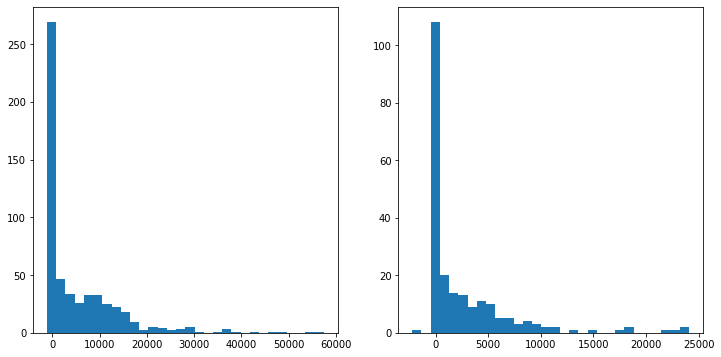

In [82]:
# Lets compare histograms
weekdays_x = melt[melt["DayOfWeek"].isin([1,2,3,4,5])]["TotalCasesDiff"]
weekend_x = melt[melt["DayOfWeek"].isin([0,6])]["TotalCasesDiff"]

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.hist(weekdays_x, bins=30)

plt.subplot(122)
plt.hist(weekend_x, bins=30)